In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Kmeans

In [2]:
df = pd.read_csv('Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
df = df.drop(['Address'], axis = 1)
# df.head()

In [4]:
X = df.values[:, 1:]
X = np.nan_to_num(X)
X

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [5]:
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(n_clusters = clusterNum, n_init = 12).fit(X)
labels = k_means.labels_

In [6]:
df['customer_group'] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,customer_group
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [7]:
df.groupby('customer_group').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
customer_group,,,,,,,,,
0,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


In [8]:
df[df['customer_group'] == 0].describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,customer_group
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,541.000000,650.000000,650.0
mean,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385,0.0
std,244.007344,7.274109,0.865425,5.050519,11.171708,1.060981,1.779058,0.451669,6.562027,0.0
min,1.000000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.600000,0.0
25%,225.250000,27.250000,1.000000,2.000000,22.000000,0.312750,0.913000,0.000000,5.100000,0.0
50%,429.500000,32.000000,1.000000,5.500000,29.000000,0.676500,1.589000,0.000000,8.800000,0.0
75%,638.500000,38.000000,2.000000,10.000000,40.000000,1.397250,2.697000,1.000000,13.600000,0.0
max,849.000000,55.000000,5.000000,23.000000,57.000000,7.320000,11.874000,1.000000,36.600000,0.0


In [9]:
df[df['customer_group'] == 1].describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,customer_group
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,14.000000,18.000000,18.0
mean,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222,1.0
std,229.920766,4.815891,1.371989,8.555853,71.083422,4.952349,6.958932,0.468807,4.321976,0.0
min,5.000000,37.000000,1.000000,5.000000,157.000000,0.349000,3.128000,0.000000,2.000000,1.0
25%,217.500000,42.000000,1.250000,15.250000,176.250000,1.775000,4.744250,0.000000,4.175000,1.0
50%,458.500000,45.000000,3.000000,18.000000,220.500000,3.799500,10.093000,0.000000,7.100000,1.0
75%,556.250000,50.000000,3.750000,26.500000,252.000000,7.971250,14.601500,0.750000,7.800000,1.0
max,792.000000,53.000000,5.000000,33.000000,446.000000,16.031000,27.034000,1.000000,17.600000,1.0


In [10]:
df[df['customer_group'] == 2].describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,customer_group
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,145.000000,182.000000,182.0
mean,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824,2.0
std,252.277331,6.713693,0.993712,6.569801,23.243953,3.121628,4.639720,0.379049,7.382100,0.0
min,2.000000,26.000000,1.000000,0.000000,57.000000,0.022000,0.053000,0.000000,0.100000,2.0
25%,185.500000,37.000000,1.000000,11.000000,65.250000,1.021000,2.672500,0.000000,5.400000,2.0
50%,392.500000,41.000000,2.000000,15.000000,76.000000,2.231500,4.679000,0.000000,9.150000,2.0
75%,639.500000,46.000000,3.000000,20.000000,98.750000,4.036000,7.823000,0.000000,14.375000,2.0
max,850.000000,56.000000,5.000000,33.000000,150.000000,20.561000,35.197000,1.000000,41.300000,2.0


Text(0.5, 1.0, 'kmeans')

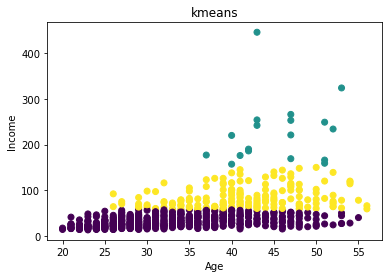

In [11]:
plt.figure()
plt.scatter(x = df['Age'], y = df['Income'], c=df['customer_group'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('kmeans')

# DBSCAN

In [12]:
from sklearn.datasets import make_blobs

In [13]:
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
X, y = make_blobs(n_samples = 400, centers= centers, cluster_std=0.4, random_state=0)

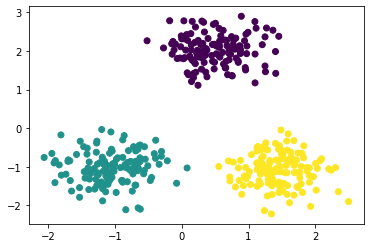

In [14]:
plt.scatter(X[:, 0], X[:, -1], c = y)

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
dbscan = DBSCAN(eps = 0.4, min_samples = 10).fit(X)

In [17]:
dbscan.labels_[dbscan.labels_ == -1].size

8

In [18]:
df = pd.DataFrame(X[:, 0], X[:, 1])
df.reset_index(level=0, inplace=True)
df.columns = ['x', 'y']
df['cluster'] = dbscan.labels_

In [19]:
df.head()

,x,y,cluster
0,-0.641778,1.742048,0
1,-1.365113,0.721719,0
2,-1.355488,-0.903153,1
3,2.771813,0.300787,2
4,2.272638,0.086303,2


In [20]:
df[df['cluster'] == 0].describe()

,x,y,cluster
count,132.000000,132.000000,132.0
mean,-1.068712,1.442636,0.0
std,0.405776,0.354439,0.0
min,-2.218457,0.554330,0.0
25%,-1.356048,1.215619,0.0
50%,-1.042233,1.451691,0.0
75%,-0.821411,1.681125,0.0
max,-0.047702,2.346716,0.0


In [21]:
df[df['cluster'] == 1].describe()

,x,y,cluster
count,127.000000,127.000000,127.0
mean,-0.994585,-1.061940,1.0
std,0.369540,0.398315,0.0
min,-1.880577,-2.063669,1.0
25%,-1.273925,-1.279350,1.0
50%,-0.974058,-1.074021,1.0
75%,-0.766964,-0.728760,1.0
max,-0.035019,-0.217635,1.0


In [22]:
df[df['cluster'] == 2].describe()

,x,y,cluster
count,133.000000,133.000000,133.0
mean,2.026957,0.478224,2.0
std,0.385978,0.397315,0.0
min,1.110639,-0.521196,2.0
25%,1.802672,0.174741,2.0
50%,2.025305,0.460619,2.0
75%,2.272638,0.756053,2.0
max,2.896357,1.453258,2.0


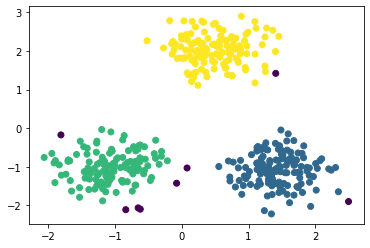

In [23]:
plt.scatter(X[:, 0], X[:, -1], c = dbscan.labels_)